importing libaries 

In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.axes  as ax

Loading the dataset

In [18]:
data = pd.read_csv("data_for_lr.csv")
data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [20]:
data.isnull().sum()

x    0
y    1
dtype: int64

data processing

In [21]:
dadta = data.dropna(inplace = True)

In [22]:
print("The shape of the data :",data.shape)

The shape of the data : (699, 2)


spliting the data_for_lr.csv

In [23]:
train_input = np.array(data.x[:500]).reshape(500,1)
train_output = np.array(data.y[:500]).reshape(500,1)

In [24]:
test_input = np.array(data.x[500:]).reshape(199,1)
test_output = np.array(data.y[500:]).reshape(199,1)

In [25]:
print(f"training input data shape = {train_input.shape}")
print(f"training output data shape = {train_input.shape}")
print(f"test input data shape = {test_input.shape}")
print(f"test output data shape = {test_input.shape}")

training input data shape = (500, 1)
training output data shape = (500, 1)
test input data shape = (199, 1)
test output data shape = (199, 1)


<font color = "green">Linear regression</font>

forward propogation

f(x) = mx + c

cost functions 

1/2n *(y-f(x)^2)

Gradient Decent

df = f(x) - y
dm = df*x
dc =df *1

d(cost)/dm = df/dm

## update parameter

m = m -(learning_rate *dm)
c = c -(learning_rate *dc)

## Model training 

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def forward_propagation(train_input, parameters):
    m = parameters["m"]
    c = parameters["c"]
    predictions = m * train_input + c
    return predictions

def cost_function(predictions, train_output):
    # Mean Squared Error (MSE) as the cost function
    mse = np.mean((predictions - train_output)**2)
    return mse

def backward_propagation(train_input, train_output, predictions):
    m_grad = np.mean((predictions - train_output) * train_input)
    c_grad = np.mean(predictions - train_output)
    return {"dm": m_grad, "dc": c_grad}

def update_parameters(parameters, derivatives, learning_rate):
    parameters["m"] -= learning_rate * derivatives["dm"]
    parameters["c"] -= learning_rate * derivatives["dc"]
    return parameters

def train(train_input, train_output, learning_rate, iters):
    parameters = dict()
    parameters["m"] = np.random.uniform(0, 1)
    parameters["c"] = np.random.uniform(0, 1)

    plt.figure()
    loss = []

    for i in range(iters):
        predictions = forward_propagation(train_input, parameters)
        cost = cost_function(predictions, train_output)
        loss.append(cost)
        print(f"Iteration = {i + 1}, Loss = {cost}")

        plt.plot(train_input, train_output, "+", label="Original")
        plt.plot(train_input, predictions, label="Predicted")
        plt.legend()
        plt.show()

        derivatives = backward_propagation(train_input, train_output, predictions)
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters


## training

Iteration = 1, Loss = 2686.738189851108


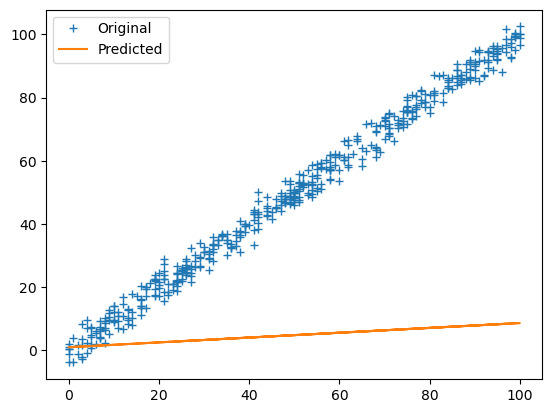

Iteration = 2, Loss = 1223.4601440091533


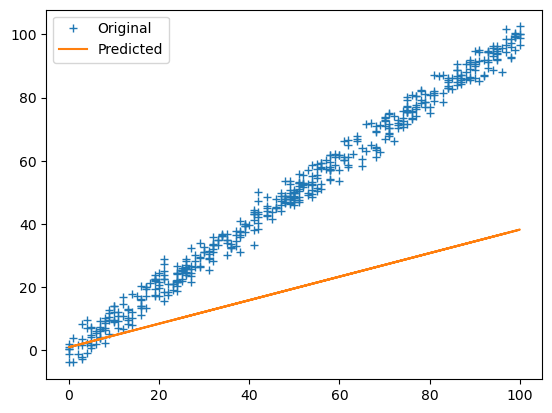

Iteration = 3, Loss = 559.5692631645769


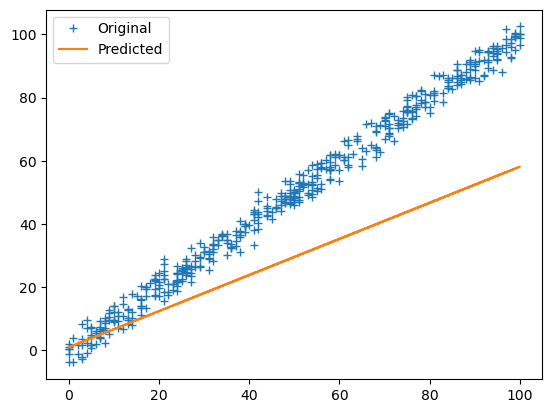

Iteration = 4, Loss = 258.36122451401843


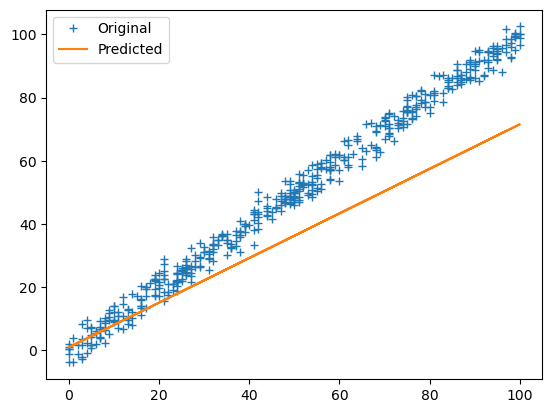

Iteration = 5, Loss = 121.70279308988606


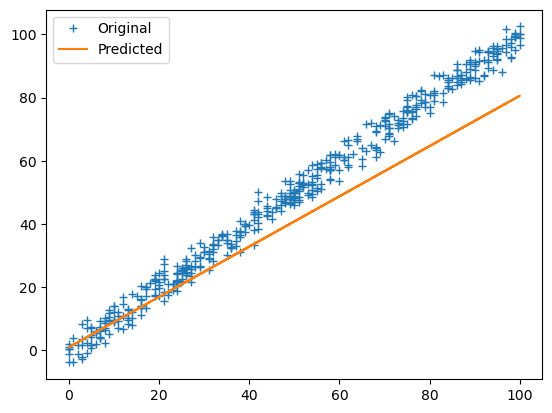

Iteration = 6, Loss = 59.70070072684706


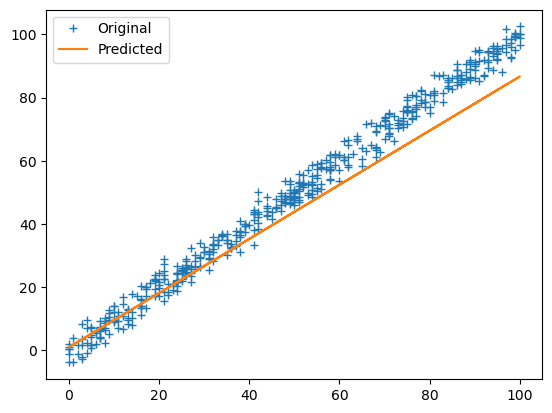

Iteration = 7, Loss = 31.57027208880101


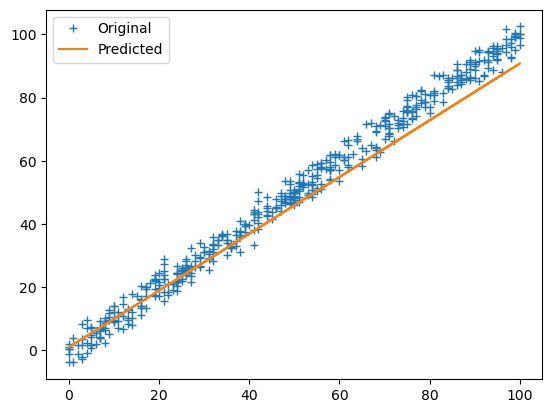

Iteration = 8, Loss = 18.807454800971826


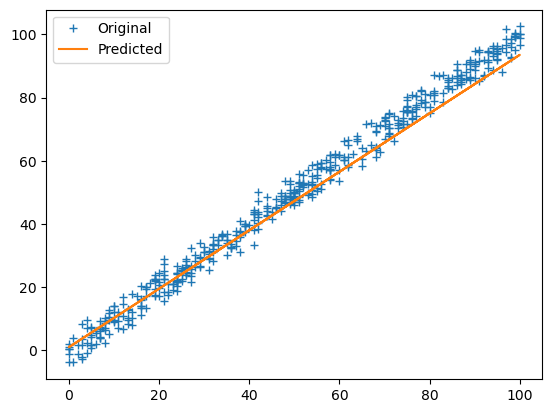

Iteration = 9, Loss = 13.01693980507245


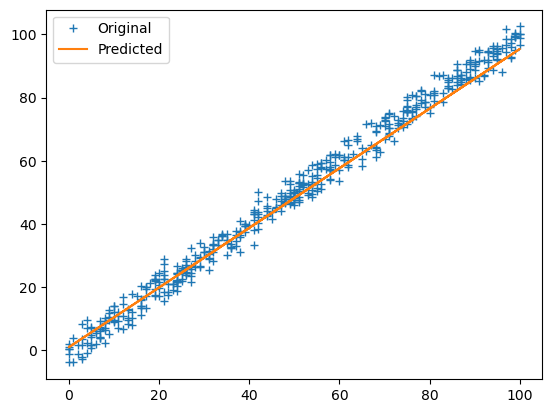

Iteration = 10, Loss = 10.389766082367796


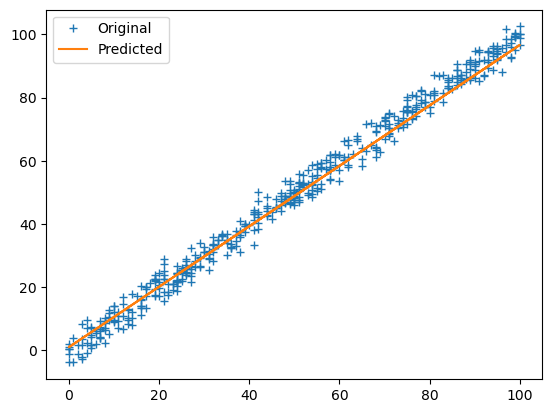

Iteration = 11, Loss = 9.197803799695478


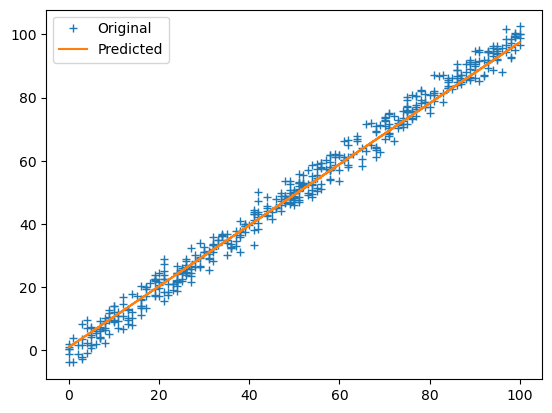

Iteration = 12, Loss = 8.656998537601927


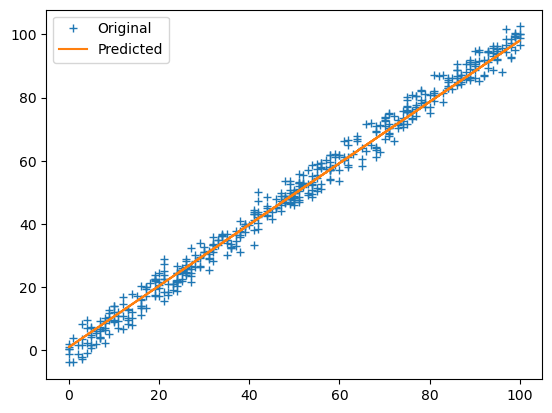

Iteration = 13, Loss = 8.411623937529988


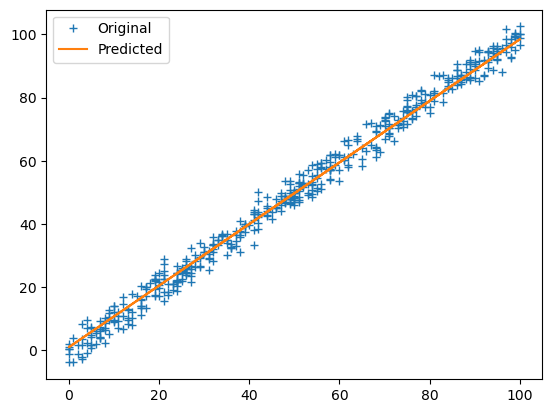

Iteration = 14, Loss = 8.30028655658508


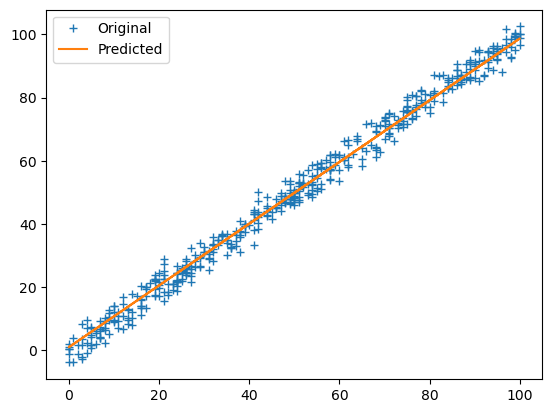

Iteration = 15, Loss = 8.249762010959895


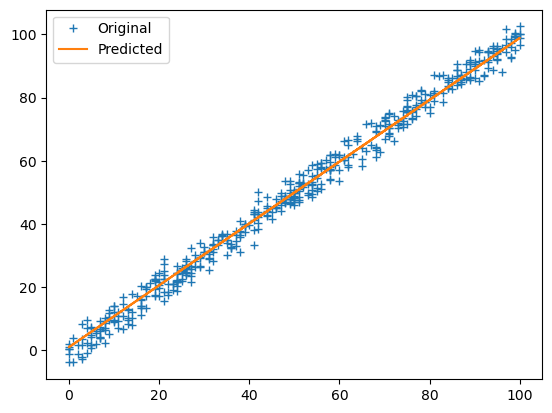

Iteration = 16, Loss = 8.226828316614672


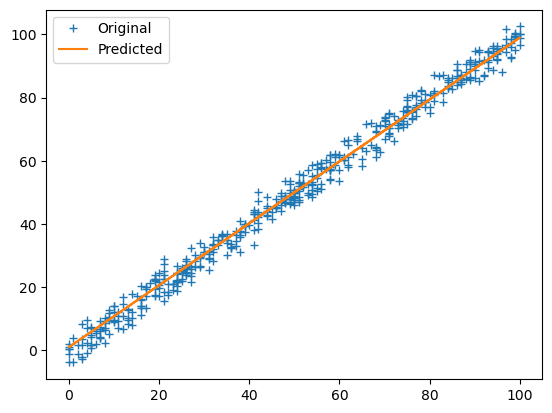

Iteration = 17, Loss = 8.216412622592513


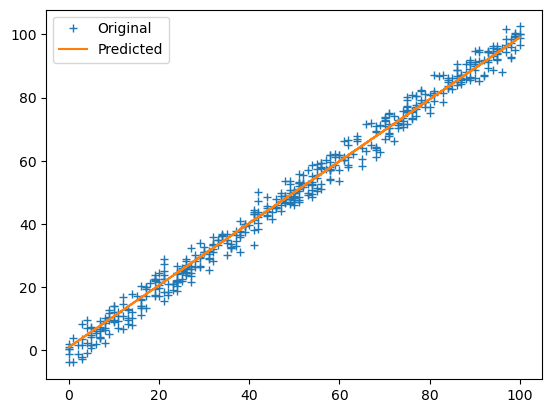

Iteration = 18, Loss = 8.21167635971893


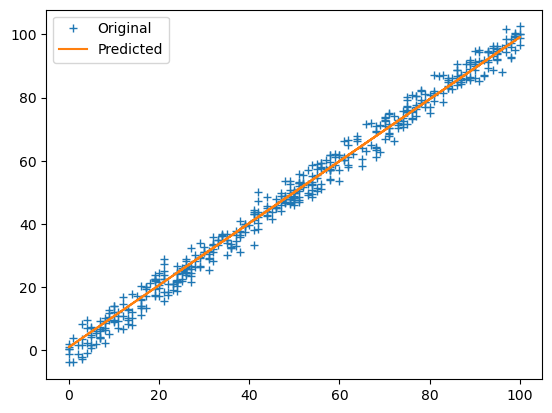

Iteration = 19, Loss = 8.209516861584754


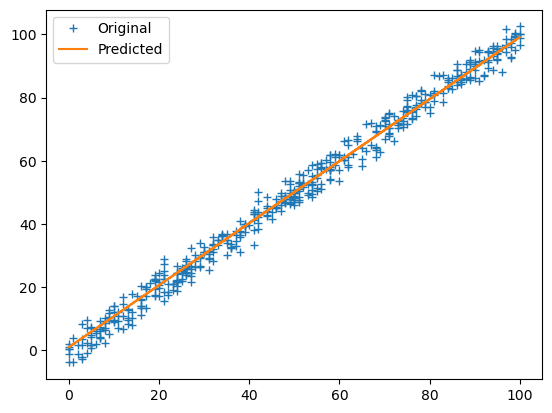

Iteration = 20, Loss = 8.208526445003473


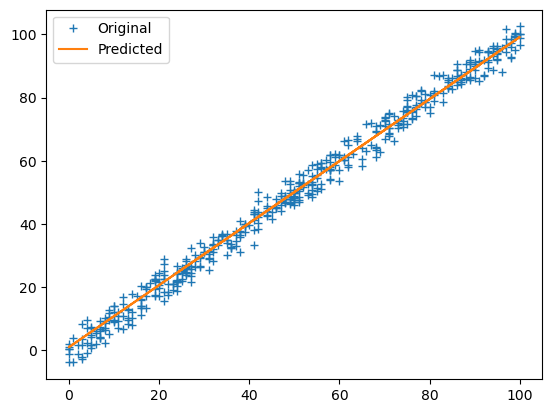

In [27]:
parameter , loss = train(train_input,train_output,0.0001,20)

In [28]:
print(parameter)

m


In [30]:
test_predictions = test_input * parameter["n"] +parameter["c"]

TypeError: string indices must be integers, not 'str'

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lr_model = LinearRegression()

In [34]:
lr_model.fit(train_input,train_output)


LinearRegression()

In [35]:
lr_model.coef_

array([[1.0009993]])

In [36]:
lr_model.intercept_

array([-0.23603461])